<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


79.46

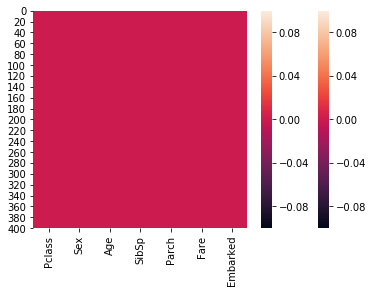

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

train_df = pd.read_csv(r'F:\Datasets\titanic\train.csv')
test_file = r'F:\Datasets\titanic\test.csv'
test_df = pd.read_csv(test_file)
train_df.head()
test_df.head()

#checking for na values
train_df[train_df['Embarked'].isna()]

#filling na values intrain data
train_df['Embarked'].fillna(value = 'C', inplace = True)
train_df['Sex'].replace({'male':0,'female':1}, inplace=True)
train_df['Embarked'].replace({'S':0,'C':1,'Q':2}, inplace=True)
train_df['Age'].fillna((train_df['Age'].mean()), inplace = True)
train_df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

train_df.head()

#vizualising for null values in train data
sns.heatmap(train_df.isnull())

#data processing in test data
test_df.fillna(test_df['Age'].mean(), inplace = True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace=True)
test_df['Sex'].unique()
test_df['Embarked'].unique()
test_df['Sex'].replace({'male':0, 'female':1}, inplace= True)
test_df['Embarked'].replace({'Q':0,'S':1,'C':2}, inplace =True)

#Vizualising for missing values in testdata
sns.heatmap(test_df.isnull())

train_df.info()
test_df.info

#proceesing the data to train and test
x_train = train_df.drop(['Survived'], axis = 1)
y_train = train_df['Survived']
x_test = test_df

#finding shape of x_train, x_test, y_train
x_train.shape, y_train.shape, x_test.shape

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian